#Интервальные числа

##Операции над интервальными числами

In [215]:
class Interval:
    def __init__(self, interval):
        self.interval = interval  

    
    def __add__(self, other):
        answer = []
        for i in range(2):
            answer.append(self.interval[i] + other.interval[i])
        return Interval(answer)
    

    def __sub__(self, other):
        answer = []
        answer.append(self.interval[0] - other.interval[1])
        answer.append(self.interval[1] - other.interval[0])
        return Interval(answer)
    

    def __mul__(self, other):
        answer = []
        if type(other.interval) == list:
            temp = []
            for i in self.interval:
                for j in other.interval:
                    temp.append(i * j)
            return Interval([min(temp), max(temp)])
        else:
            answer = [] 
            if other.interval > 0:
                for i in self.interval:
                    answer.append(other.interval * i)
            else:
                for i in self.interval[::-1]:
                    answer.append(other.interval * i)
            return Interval(answer)
    

    def __truediv__(self, other):
        other.interval = [1 / i for i in other.interval][::-1]
        return Interval(self.interval) * Interval(other.interval)


    def diff_int(self, other, n):
        right = (2 ** (n - 1) * (other.interval[1] - other.interval[0])) / \
            ((self.interval[1] - self.interval[0]) ** n)
        left = -right
        return [left, right]


##Апробация калькулятора

In [216]:
a = Interval([2, 4])
b = Interval([3, 5])
k = Interval(3)


In [217]:
print((a + b).interval, ' - Сложение интервальных чисел')


[5, 9]  - Сложение интервальных чисел


In [218]:
print((a - b).interval, ' - Вычитание интервальных чисел')

[-3, 1]  - Вычитание интервальных чисел


In [219]:
print((a * b).interval, ' - Умножение интервальных чисел')

[6, 20]  - Умножение интервальных чисел


In [220]:
print((a / b).interval, ' - Деление интервальных чисел')

[0.4, 1.3333333333333333]  - Деление интервальных чисел


In [221]:
print((a * k).interval, ' - Умножение на К > 0')


[6, 12]  - Умножение на К > 0


In [222]:
k = Interval(-3)
print((a * k).interval, ' - Умножение на К < 0')


[-12, -6]  - Умножение на К < 0


In [223]:
x = [2, 4]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 4 #Порядок производной
print(Interval.diff_int(x, y, n), ' - Производная интервальных чисел 4-го порядка')


[-16.5, 16.5]  - Производная интервальных чисел 4-го порядка


In [224]:
x = [3, 6]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 3 #Порядок производной
print(Interval.diff_int(x, y, n), ' - Производная интервальных чисел 3-го порядка')


[-10.518518518518519, 10.518518518518519]  - Производная интервальных чисел 3-го порядка


In [225]:
x = [-10, 5]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 9 #Порядок производной
print(Interval.diff_int(x, y, n), ' - - Производная интервальных чисел 9-го порядка')

[-4.994360615759793e-07, 4.994360615759793e-07]  - - Производная интервальных чисел 9-го порядка


Подсчет функция А1 и А2

In [248]:
a = [2, 4]
b = [3, 5]
k = 3
a = Interval([2, 4])
b = Interval([3, 5])
k = Interval(3)


def a1(a, b, k):
    a_sqr = a * a
    b_sqr = b * b
    first = a_sqr * Interval(k.interval ** 2)
    second = (a * b) * Interval(2 * k.interval * (k.interval - 1))
    third = b_sqr * Interval(k.interval ** 2)
    answer = ((first + second) + third) * Interval(0.5)
    return answer.interval

print(a1(a, b, k))

def a2(a, b, k):
    answer = (a + b) * k
    return answer.interval

print(a2(a, b, k))

[94.5, 304.5]
[15, 27]


#Нечеткие числа

##Функция определения

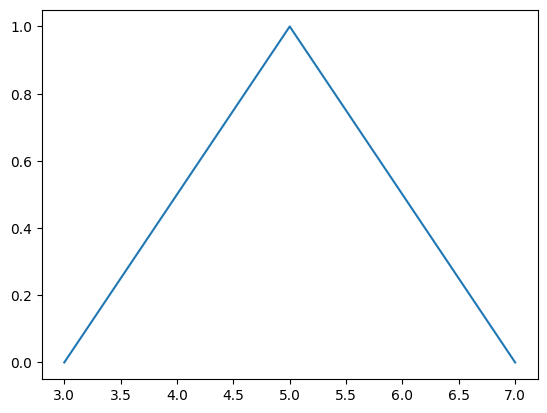

In [227]:
import numpy as np
from matplotlib import pyplot as plt

a, b, c = 3, 5, 7
def func(x, a, b, c):
    if x <= a:
        return 0
    elif a <= x <= b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)
    elif c <= x:
        return 0


ans_arr = []
for i in np.arange(a, c + 1):
    ans_arr.append(func(i, a, b, c))

x = [i for i in np.arange(a, c + 1)]
y = np.array(ans_arr)
plt.plot(x, ans_arr)


##Операции над треугольными нечеткими числами

In [228]:
from sympy import diff, symbols, cos, sin, lambdify
import sys
import sympy as sy
sys.setrecursionlimit(10000)

class Triangle:


    def __init__(self, number):
        self.number = number


    def partition(self, array, left, right, pivot, array2):
        while left < right:
            while left < right:
                if array[pivot] > array[right]:
                    break
                right = right - 1
            while left < right:
                if array[pivot] < array[left]:
                    break
                left = left + 1
            if left < right:
                array[left], array[right] = array[right], array[left]
                array2[left], array2[right] = array2[right], array2[left]
        if array[left] > array[pivot]:
            array[left], array[pivot] = array[pivot], array[left]
            array2[left], array2[pivot] = array2[pivot], array2[left]
            return left
        else:
            array[left + 1], array[pivot] = array[pivot], array[left + 1]
            array2[left + 1], array2[pivot] = array2[pivot], array2[left + 1]
            return left + 1


    def QuickSort(self, array, start, stop, array2):
        if stop <= start:
            return
        else:
            part = self.partition(array, start, stop-1, stop, array2)
            self.QuickSort(array, start, part-1, array2)
            self.QuickSort(array, part+1, stop, array2)



    def get_max(self, dct):
        self.x, self.y = [], []
        for i in self.dct:
            self.x.append(i)
            self.y.append(max(self.dct.get(i)))
        self.QuickSort(self.x, 0, len(self.x) - 1, self.y)
        return Triangle([self.x, self.y])


    def __add__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = self.number[0][i] + other.number[0][j]
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    
    
    def __sub__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = self.number[0][i] - other.number[0][j]
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def __mul__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = round(self.number[0][i] * other.number[0][j], 4)
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)

    
    def __truediv__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = round(self.number[0][i] / other.number[0][j], 4)
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def min(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = min(self.number[0][i], other.number[0][j])
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    
    
    def __pow__(self, k: float): #формула с Леонкова стр. 94
        numb = self.number[0]
        ver_numb = self.number[1]
        for i in range(len(ver_numb)):
            ver_numb[i] = round(ver_numb[i] ** k, 4)
        return Triangle([numb, ver_numb])
    

    def max(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = max(self.number[0][i], other.number[0][j])
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def diff_at_point(self, point):
        n = len(self.number[0])
        functions = self.number[0]
        self.y = self.number[1]
        self.point = point
        self.x = []
        for i in range(n):
            functions[i] = diff(functions[i], x)
            f = lambdify(x, functions[i])
            self.x.append(f(self.point))
        self.QuickSort(self.x, 0, len(self.x)-1, self.y)
        return Triangle([self.x, self.y])


    def diff_point(self, function):
        diffs = diff(function)
        elem_point = self.number[0]
        ver = self.number[1]
        n = len(elem_point)
        numb = []
        self.dct = {}
        for i in elem_point:
            temp = lambdify(x, diffs)
            numb.append(temp(i))
        for i in range(n):
            if numb[i] not in self.dct:
                self.dct.update({numb[i]: []})
            self.dct[numb[i]].append(ver[i])
        return self.get_max(self.dct)


    def int_over_crisp(self):
        functions = self.number[0]
        n = len(self.number[1])
        self.y = self.number[1]
        self.x = []
        border = [i for i in range(1, n+1)]
        for i in range(n):
            self.x.append(sy.integrate(functions[i], \
                                       (x, border[0], border[-1])))
        self.QuickSort(self.x, 0, len(self.x)-1, self.y)
        return Triangle([self.x, self.y])
    

    def mean(self): #среднее нечеткого числа
        num = self.number[0]
        ver_num = self.number[1]
        numerator, denominator = 0, 0
        for i in range(len(num)):
            numerator = numerator + num[i] * ver_num[i]
            denominator = denominator + ver_num[i]
        e = round(numerator / denominator, 2)
        return e

    

    def int_over_fuzz_lim(self, other, fucntion):
        I = []
        x = sy.Symbol("x")
        down_limit = self.number[0]
        ver_down_limit = self.number[1]
        up_limit = other.number[0]
        ver_up_limit = other.number[1]
        n = len(down_limit)
        m = len(up_limit)
        new_ver = []
        self.dct = {}
        for i in range(n):
            for j in range(m):
                I.append(round(sy.integrate(fucntion, \
                                            (x, down_limit[i], up_limit[j])), \
                               2))
                new_ver.append(min(ver_down_limit[i], ver_up_limit[j]))
        for i in range(len(I)):
            if I[i] not in self.dct:
                self.dct.update({I[i]: []})
            self.dct[I[i]].append(new_ver[i])
        return self.get_max(self.dct)



##Апробация калькулятора

In [229]:
a = Triangle([[3, 5, 6], [0.2, 0.6, 0.8]])
b = Triangle([[1, 2, 3], [0.1, 0.5, 0.6]])

[[4, 5, 6, 7, 8, 9], [0.1, 0.2, 0.2, 0.5, 0.6, 0.6]] - Сложение нечетких чисел


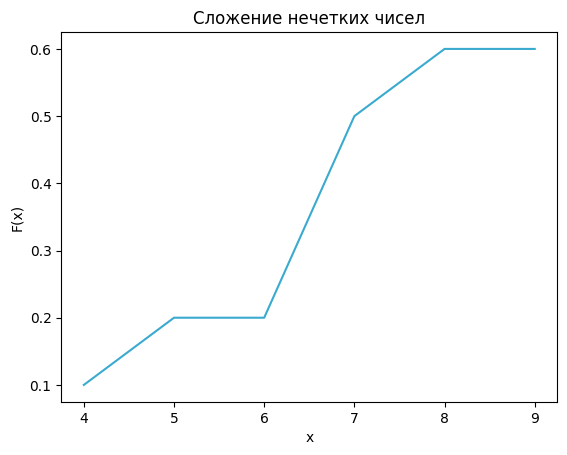

In [230]:
print((a + b).number, '- Сложение нечетких чисел')
plt.title('Сложение нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot((a + b).number[0], (a + b).number[1], color='#3AAACF')
plt.show()

[[0, 1, 2, 3, 4, 5], [0.2, 0.2, 0.6, 0.6, 0.5, 0.1]] - Вычитание нечетких чисел


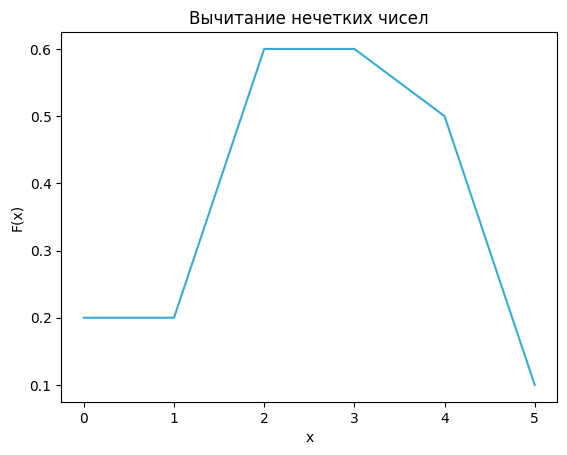

In [231]:
print((a - b).number, '- Вычитание нечетких чисел')
plt.title('Вычитание нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot((a - b).number[0], (a - b).number[1], color='#3AAACF')
plt.show()

[[3, 5, 6, 9, 10, 12, 15, 18], [0.1, 0.1, 0.2, 0.2, 0.5, 0.5, 0.6, 0.6]] - Умножение нечетких чисел


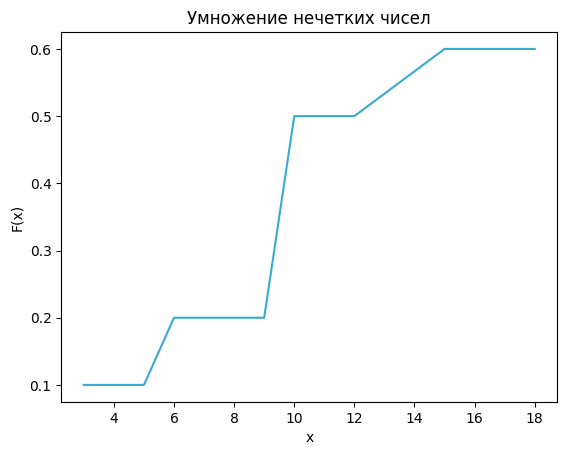

In [232]:
print((a * b).number, '- Умножение нечетких чисел')
plt.title('Умножение нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot((a * b).number[0], (a * b).number[1], color='#3AAACF')
plt.show()

[[1.0, 1.5, 1.6667, 2.0, 2.5, 3.0, 5.0, 6.0], [0.2, 0.2, 0.6, 0.6, 0.5, 0.5, 0.1, 0.1]] - Деление нечетких чисел


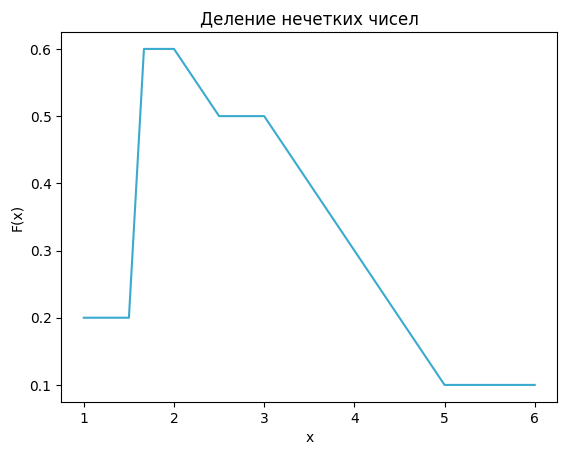

In [233]:
print((a / b).number, '- Деление нечетких чисел')
plt.title('Деление нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot((a / b).number[0], (a / b).number[1], color='#3AAACF')
plt.show()

[[3, 5, 6], [0.04, 0.36, 0.64]] - Возведение в степень нечетких чисел


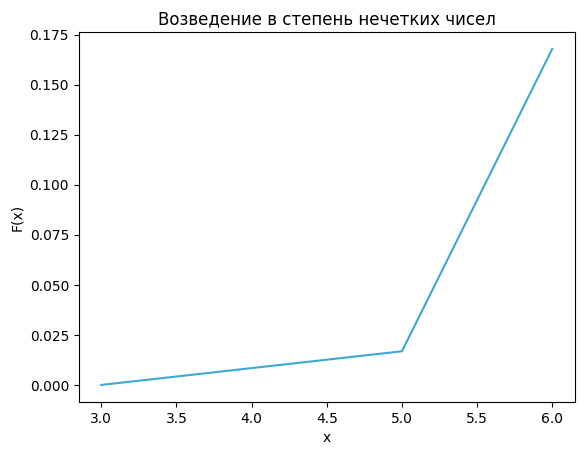

In [234]:
print((a ** 2).number, '- Возведение в степень нечетких чисел')
plt.title('Возведение в степень нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot((a ** 2).number[0], (a ** 2).number[1], color='#3AAACF')
plt.show()

[[3, 5, 6], [0.0, 0.0168, 0.1678]] - Расширенный максимум нечетких чисел


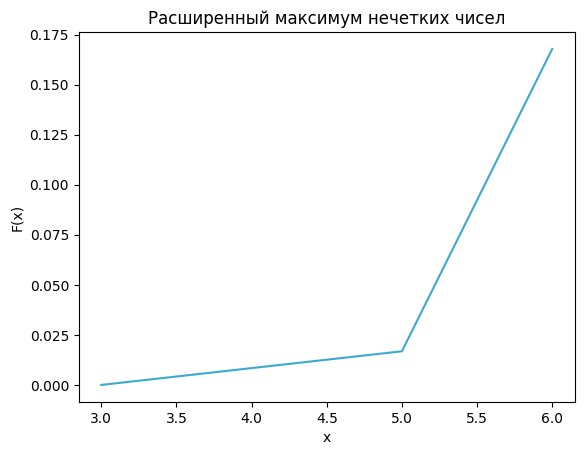

In [235]:
print(Triangle.max(a, b).number, '- Расширенный максимум нечетких чисел')
plt.title('Расширенный максимум нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(Triangle.max(a, b).number[0], Triangle.max(a, b).number[1], color='#3AAACF')
plt.show()

[[1, 2, 3], [0.1, 0.1678, 0.1678]] - Расширенный минимум нечетких чисел


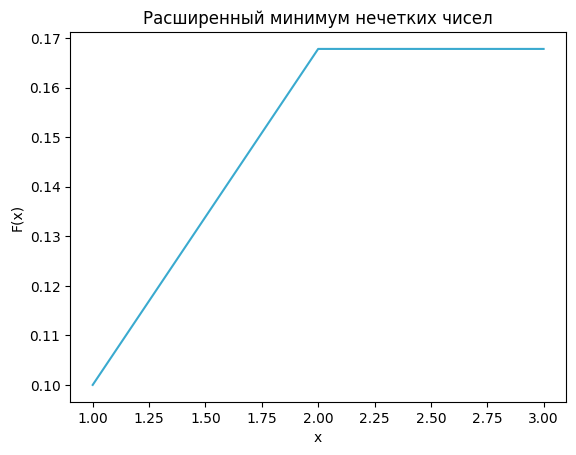

In [236]:
print(Triangle.min(a, b).number, '- Расширенный минимум нечетких чисел')
plt.title('Расширенный минимум нечетких чисел', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(Triangle.min(a, b).number[0], Triangle.min(a, b).number[1], color='#3AAACF')
plt.show()

[[2, 3, 4], [0.1, 0.9, 0.4]]  - Производная нечеткого числа в точке


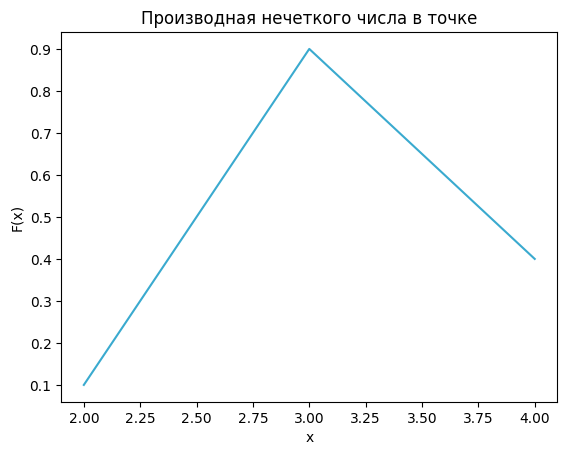

In [237]:
x = symbols('x')
functions = [2 * x, x ** 2 + 1, 3 * x - 1]
point = 2
ver_num = [0.1, 0.4, 0.9]
number = Triangle([functions, ver_num])
answer = Triangle.diff_at_point(number, point).number
print(answer, ' - Производная нечеткого числа в точке')

plt.title('Производная нечеткого числа в точке', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(answer[0], 
         answer[1], color='#3AAACF')
plt.show()

[[0, 12, 48], [1.0, 0.8, 0.4]]  - Производная нечеткого числа в точках


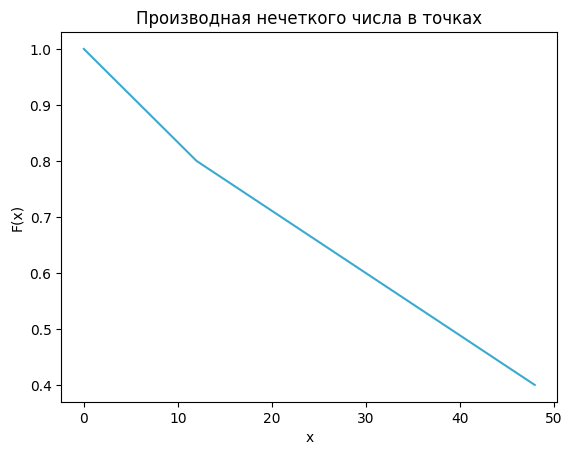

In [238]:
x = symbols('x')
function = 4 * x ** 3
number = Triangle([[-2, -1, 0, 1, 2], [0.2, 0.6, 1.0, 0.8, 0.4]])
Triangle.diff_point(number, function).number
answer = Triangle.diff_point(number, function).number

print(answer, ' - Производная нечеткого числа в точках')
plt.title('Производная нечеткого числа в точках', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(answer[0], 
         answer[1], color='#3AAACF')
plt.show()

[[-69/4, 3/4, 12, 42], [1.0, 0.9, 0.2, 0.7]]  - Интеграл в четких границах


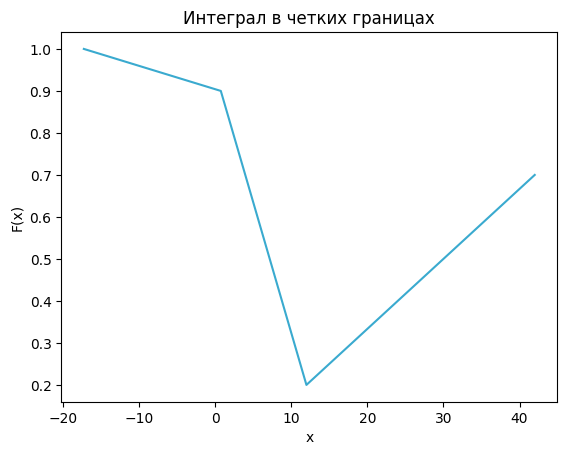

In [239]:
x = sy.Symbol("x")
functions = [2 * x ** 2, 2 * x - 1, x ** (-2), x ** 3 - 4 * x ** 2 + 1]
ver_num = [0.7, 0.2, 0.9, 1.0]

number = Triangle([functions, ver_num])
answer = Triangle.int_over_crisp(number).number

print(answer, ' - Интеграл в четких границах')
plt.title('Интеграл в четких границах', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(answer[0], 
         answer[1], color='#3AAACF')
plt.show()


[[3, 6, 9, 10.50, 12, 13.50, 15, 19.50, 21], [0.1, 0.5, 0.4, 0.6, 0.4, 0.4, 0.5, 0.8, 0.4]]  - Интеграл в нечетких границах


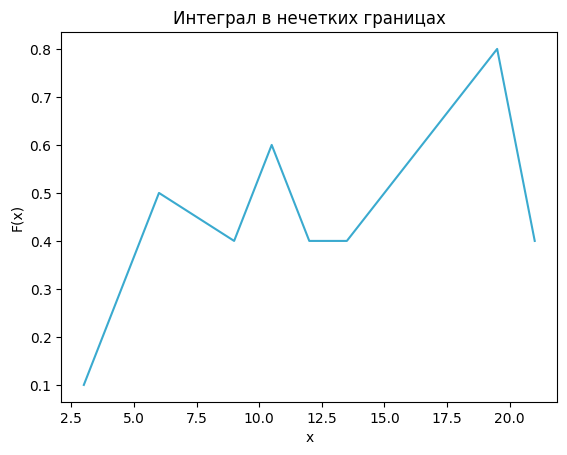

In [240]:
down = Triangle([[2, 4, 5], [0.8, 0.4, 0.6]])
up = Triangle([[6, 7, 8.5, 9], [0.1, 0.5, 0.9, 0.4]])
function = 3


answer = Triangle.int_over_fuzz_lim(down, up, function).number
print(answer, ' - Интеграл в нечетких границах')
plt.title('Интеграл в нечетких границах', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(answer[0], 
         answer[1], color='#3AAACF')
plt.show()